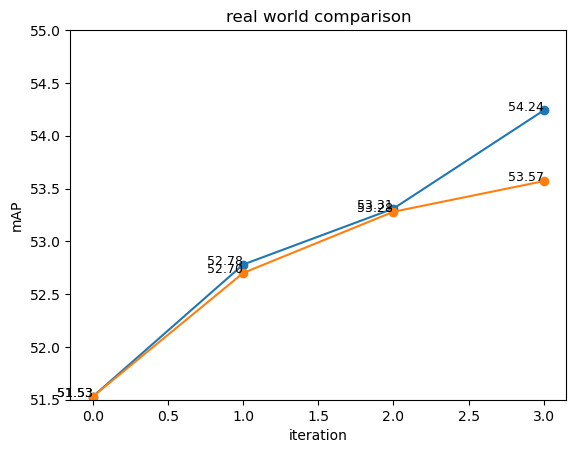

In [11]:
import matplotlib.pyplot as plt

# 데이터
BDD35k_BDD15k = [51.53, 52.78, 53.31, 54.24]
BDD35k_RL15k = [51.53, 52.70, 53.28, 53.57]
iterations = [0, 1, 2, 3]

# 플롯 생성
plt.plot(iterations, BDD35k_BDD15k, marker='o')
plt.plot(iterations, BDD35k_RL15k, marker='o')

# 각 데이터 포인트에 레이블 추가
for i, value in enumerate(BDD35k_BDD15k):
    plt.text(iterations[i], value, f'{value:.2f}', fontsize=9, ha='right')

for i, value in enumerate(BDD35k_RL15k):
    plt.text(iterations[i], value, f'{value:.2f}', fontsize=9, ha='right')

# 그래프 라벨 및 제목
plt.xlabel('iteration')
plt.ylabel('mAP')
plt.title('real world comparison')

# y축 범위 설정 (필요에 따라)
plt.ylim(51.50, 55)

# 그래프 저장 및 출력
# plt.savefig("./comparison_BDD35k+BDD15k_vs_BDD35k_RL15k.jpg")
plt.show()


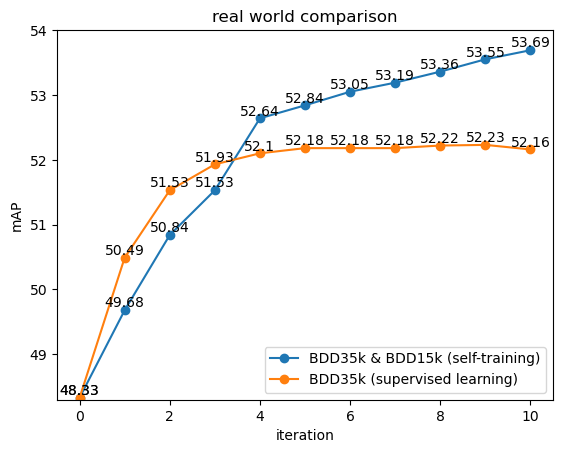

In [23]:
import matplotlib.pyplot as plt

data_source = ['BDD35k & BDD15k (self-training)', 'BDD35k (supervised learning)']
mAP = [[48.33, 49.68, 50.84, 51.53, 52.64, 52.84, 53.05, 53.19, 53.36, 53.55, 53.69],
       [48.33, 50.49, 51.53, 51.93, 52.10, 52.18, 52.18, 52.18, 52.22, 52.23, 52.16]]

# 각 데이터 소스를 개별적으로 플로팅하고 레이블 추가
for idx, source in enumerate(data_source):
    plt.plot(mAP[idx], marker='o', label=source)
    for i, mAP_value in enumerate(mAP[idx]):
        plt.text(i, mAP_value, f'{mAP_value}', ha='center', va='bottom')

plt.xlabel("iteration")
plt.ylabel("mAP")
plt.ylim(48.3, 54)  # y축 범위 설정
plt.title("real world comparison")

plt.legend(loc='lower right')  # 범례 추가

plt.savefig("./comparison_BDD35k+BDD15k_vs_BDD35k.jpg")
plt.show()


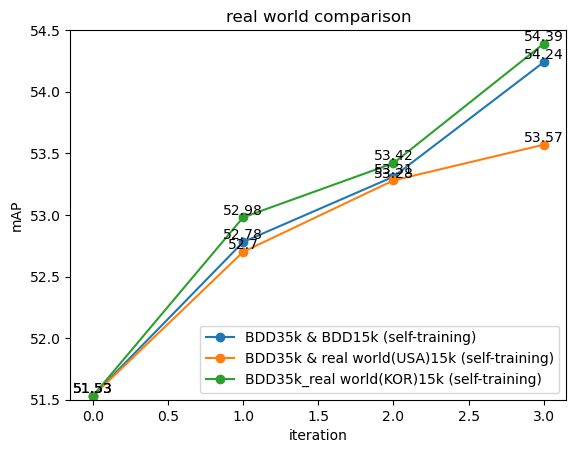

In [46]:
import matplotlib.pyplot as plt

data_source = ['BDD35k & BDD15k (self-training)', 'BDD35k & real world(USA)15k (self-training)', 'BDD35k_real world(KOR)15k (self-training)']
mAP = [[51.53, 52.78, 53.31, 54.24],
       [51.53, 52.70, 53.28, 53.57],
       [51.53, 52.98, 53.42, 54.39]]

# 각 데이터 소스를 개별적으로 플로팅하고 레이블 추가
for idx, source in enumerate(data_source):
    plt.plot(mAP[idx], marker='o', label=source)
    for i, mAP_value in enumerate(mAP[idx]):
        plt.text(i, mAP_value, f'{mAP_value}', ha='center', va='bottom')

plt.xlabel("iteration")
plt.ylabel("mAP")
plt.ylim(51.5, 54.5)  # y축 범위 설정
plt.title("real world comparison")

plt.legend(loc='lower right')  # 범례 추가

plt.savefig("./comparison_BDD35k+BDD15k_vs_BDD35k_RL15k.jpg")
plt.show()

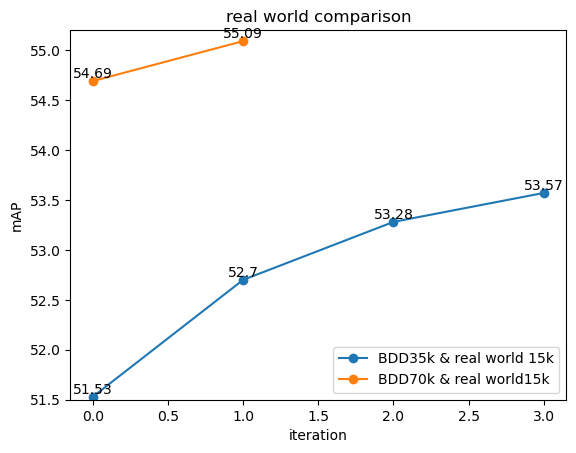

In [52]:
import matplotlib.pyplot as plt

data_source = ['BDD35k & real world 15k', 'BDD70k & real world15k']
mAP = [[51.53, 52.70, 53.28, 53.57],
       [54.69, 55.09]]

# 각 데이터 소스를 개별적으로 플로팅하고 레이블 추가
for idx, source in enumerate(data_source):
    plt.plot(mAP[idx], marker='o', label=source)
    for i, mAP_value in enumerate(mAP[idx]):
        plt.text(i, mAP_value, f'{mAP_value}', ha='center', va='bottom')

plt.xlabel("iteration")
plt.ylabel("mAP")
plt.ylim(51.5, 55.20)  # y축 범위 설정
plt.title("real world comparison")

plt.legend(loc='lower right')  # 범례 추가

plt.savefig("./comparison_BDD35k+RL15k_vs_BDD70k_RL15k.jpg")
plt.show()

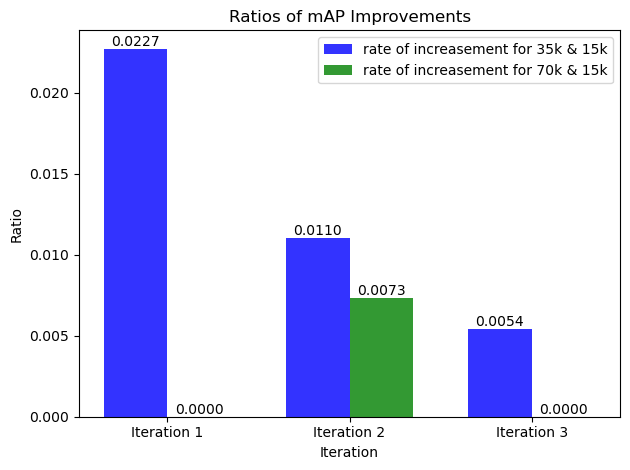

In [44]:
mAP_35k_15k = [51.53, 52.70, 53.28, 53.57]
mAP_70k_15k = [54.69, 54.69, 55.09, 55.09]

ratio_1 = []
for i in range(len(mAP_35k_15k) -1):
    gap = mAP_35k_15k[i+1] - mAP_35k_15k[i]
    ratio_1.append(gap / mAP_35k_15k[i])

ratio_2 = []
for i in range(len(mAP_70k_15k) -1):
    gap = mAP_70k_15k[i+1] - mAP_70k_15k[i]
    ratio_2.append(gap / mAP_70k_15k[i])

# 바 플롯 그리기
labels = ['Iteration {}'.format(i+1) for i in range(len(ratio_1))]  # x축 레이블 생성
x = range(len(ratio_1))  # x축 위치

fig, ax = plt.subplots()

bar_width = 0.35  # 바의 너비
opacity = 0.8

rects1 = ax.bar(x, ratio_1, bar_width, alpha=opacity, color='b', label='rate of increasement for 35k & 15k')
rects2 = ax.bar([p + bar_width for p in x], ratio_2, bar_width, alpha=opacity, color='g', label='rate of increasement for 70k & 15k')

# 값 표시
for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')

for rect in rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')

plt.xlabel('Iteration')
plt.ylabel('Ratio')
plt.title('Ratios of mAP Improvements')
plt.xticks([p + bar_width / 2 for p in x], labels)  # x축 레이블 설정
plt.legend()

plt.tight_layout()
plt.savefig("./comparison_increase_rate_35k15k_70k15k.jpg")
plt.show()

In [35]:
ratio_1

[0.022705220260042725, 0.01100569259962046, 0.005442942942942927]

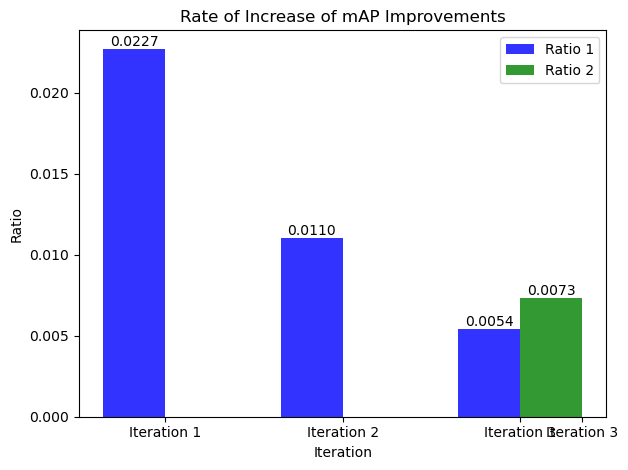

In [40]:
import matplotlib.pyplot as plt

# 데이터
mAP_35k_15k = [51.53, 52.70, 53.28, 53.57]
mAP_70k_15k = [54.69, 55.09]

ratio_1 = []
for i in range(len(mAP_35k_15k) - 1):
    gap = mAP_35k_15k[i + 1] - mAP_35k_15k[i]
    ratio_1.append(gap / mAP_35k_15k[i])

ratio_2 = []
for i in range(len(mAP_70k_15k) - 1):
    gap = mAP_70k_15k[i + 1] - mAP_70k_15k[i]
    ratio_2.append(gap / mAP_70k_15k[i])

# 바 플롯 그리기
labels = ['Iteration {}'.format(i + 1) for i in range(len(ratio_1))]  # x축 레이블 생성
x = range(len(ratio_1))  # x축 위치

fig, ax = plt.subplots()

bar_width = 0.35  # 바의 너비
opacity = 0.8

rects1 = ax.bar(x, ratio_1, bar_width, alpha=opacity, color='b', label='Ratio 1')
rects2 = ax.bar([x[-1] + bar_width], ratio_2, bar_width, alpha=opacity, color='g', label='Ratio 2')

# 값 표시
for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')

for rect in rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')

plt.xlabel('Iteration')
plt.ylabel('Ratio')
plt.title('Rate of Increase of mAP Improvements')
plt.xticks([p + bar_width / 2 for p in x] + [x[-1] + bar_width * 1.5], labels + ['Iteration 3'])  # x축 레이블 설정
plt.legend()

plt.tight_layout()
plt.show()

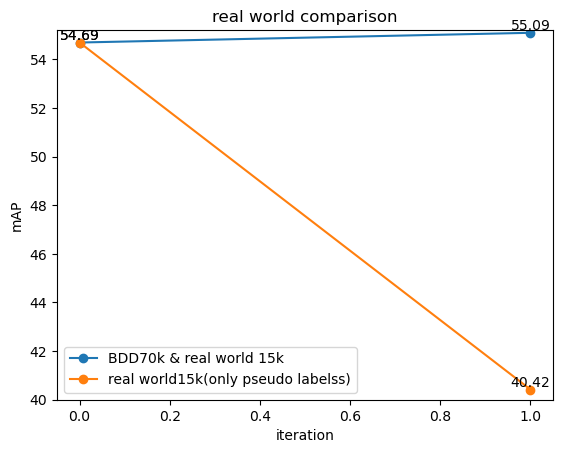

In [56]:
import matplotlib.pyplot as plt

data_source = ['BDD70k & real world 15k', 'real world15k(only pseudo labelss)']
mAP = [[54.69, 55.09],
       [54.69, 40.42]]

# 각 데이터 소스를 개별적으로 플로팅하고 레이블 추가
for idx, source in enumerate(data_source):
    plt.plot(mAP[idx], marker='o', label=source)
    for i, mAP_value in enumerate(mAP[idx]):
        plt.text(i, mAP_value, f'{mAP_value}', ha='center', va='bottom')

plt.xlabel("iteration")
plt.ylabel("mAP")
plt.ylim(40, 55.20)  # y축 범위 설정
plt.title("real world comparison")

plt.legend(loc='lower left')  # 범례 추가

plt.savefig("./comparison_BDD70k+RL15k_vs_RL15k.jpg")
plt.show()

In [32]:
2992 / 16

187.0

In [34]:
2992 / 12

249.33333333333334